# Petri dish image cropping  

#### This notebook shows the function I used to process petri dish images (cropping them), isolating only the petri dish as a square and then cropping it so it can be used in the later parts of the project.

The first block of code shows the raw image, the binary image and the cropped image. Explanations below.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [17]:
def crop_petri_dish(image):

    if len(image.shape) > 2:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    # apply Gaussian Blur to smooth the image
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 0)
    # apply binary threshold
    _, thresh = cv2.threshold(blurred, 10, 255, cv2.THRESH_BINARY) 
    
    # finding contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # filtering out very large contours which might be the image borders
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) < image.shape[0] * image.shape[1] * 0.95]

    # findng the largest contour which will be the petri dish
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # modify the bounding rectangle to crop more tightly, the margin can be changed
    margin = 90
    x += margin
    y += margin
    w -= 2 * margin
    h -= 2 * margin
    
    # ensuring the modified coordinates are within image bounds
    x = max(x, 0)
    y = max(y, 0)
    w = min(w, image.shape[1] - x)
    h = min(h, image.shape[0] - y)

    # cropping the image based on calculated coordinates
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image, (x, y, w, h)

#### Explanation:  

First it takes a random image from both image datasets. The code above uses a function called crop_petri_dish, which processes an image to isloate and enhance the visibility of a petri dish using image processing tecniques shown to us on the self study material. 

The function applies binary thresholding to convert the grayscale image into a binary image, so it's only black and white. It adjusts the threshold value based on local image properties which diffirentiates the dish from the background. Blurring is also applied to the image. After that a contour is detected, it joins all the points along the boundary of a white object on a black background. Then it adentifies the largest contour, which is the petri dish. It calculates the bounding rectangle for this contour and gives the coordinates and size (x, y, w, h). It also does it based on the margin given so that the final result can be tighter and avoid any of the edges, it can be changed to the users liking, depending on how much of the image they want in or out of the crop. 

The below code is for the remaining 3 images left to crop: 1 from Y2B_24 and 2 from Y2B_23

#### Y2B_24 dataset:

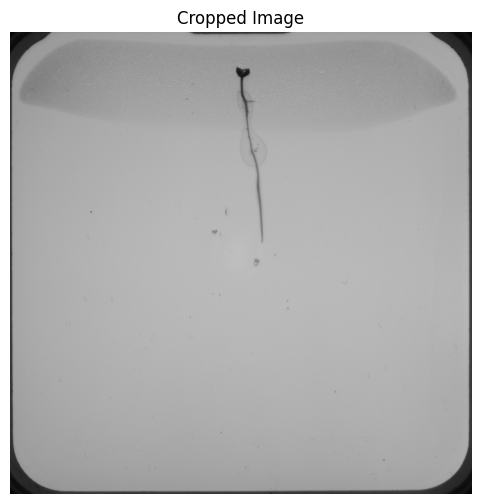

In [7]:
def display_image(img, title="Cropped Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

folder_path = r"C:\Users\emilp\Documents\Buas_Y2\Block_B\data_sets\Y-Combined_dataset\images"

images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
random_image_path = random.choice(images)
image = cv2.imread(random_image_path, cv2.IMREAD_COLOR)

    # Apply the cropping function
cropped_image, _ = crop_petri_dish(image)

    # Display the cropped image
display_image(cropped_image)

### Y23 dataset:

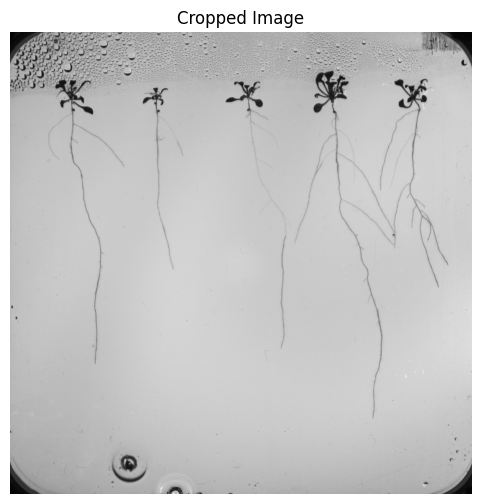

In [18]:
def display_image(img, title="Cropped Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

folder_path = r"C:\Users\emilp\Documents\Buas_Y2\Block_B\data_sets\Y-Combined_dataset\Y23\I"

images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
random_image_path = random.choice(images)
image = cv2.imread(random_image_path, cv2.IMREAD_COLOR)

    # Apply the cropping function
cropped_image2, _ = crop_petri_dish(image)

    # Display the cropped image
display_image(cropped_image)

#### Now displaying all raw images and cropped images side by side, as it was asked for.

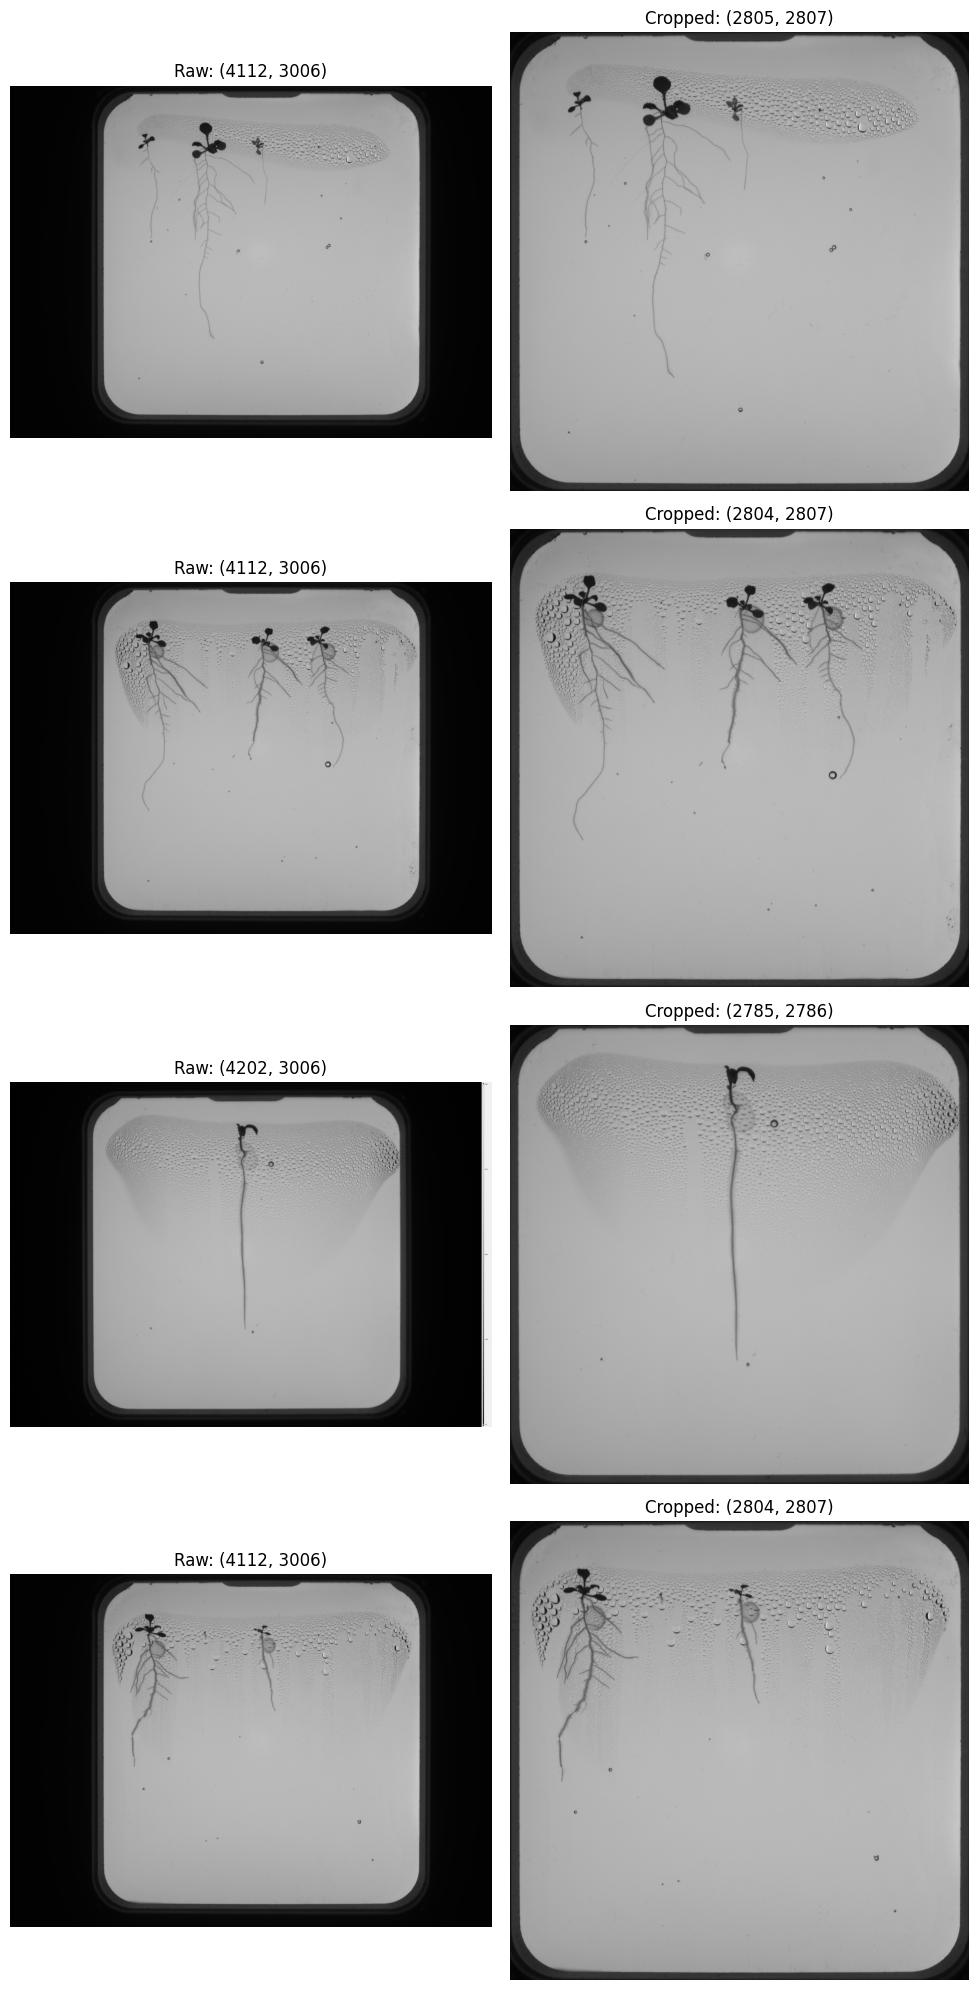

In [ ]:
directory = r"C:\Users\emilp\Documents\Buas_Y2\Block_B\data_sets\Y-Combined_dataset\total images"
all_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

selected_files = random.sample(all_files, 4)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for i in range(4):
    raw_img_path = os.path.join(directory, selected_files[i])
    raw_img = mpimg.imread(raw_img_path)
    cropped_img = crop_petri_dish(raw_img)

    raw_size = f"({raw_img.shape[1]}, {raw_img.shape[0]})"
    axes[i, 0].imshow(raw_img, cmap='gray')
    axes[i, 0].set_title(f"Raw: {raw_size}")
    axes[i, 0].axis('off')

    cropped_size = f"({cropped_img.shape[1]}, {cropped_img.shape[0]})"
    axes[i, 1].imshow(cropped_img, cmap='gray')
    axes[i, 1].set_title(f"Cropped: {cropped_size}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()